In [1]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data= pd.read_csv('creditcard.csv')
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


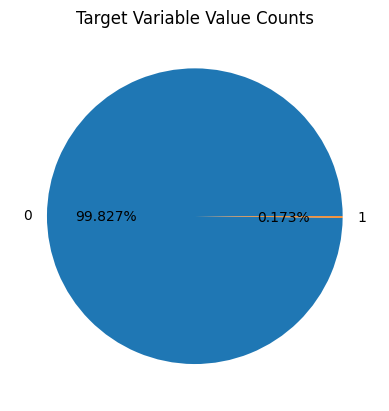

In [3]:
labels = raw_data.Class.unique()

sizes = raw_data.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

<Axes: >

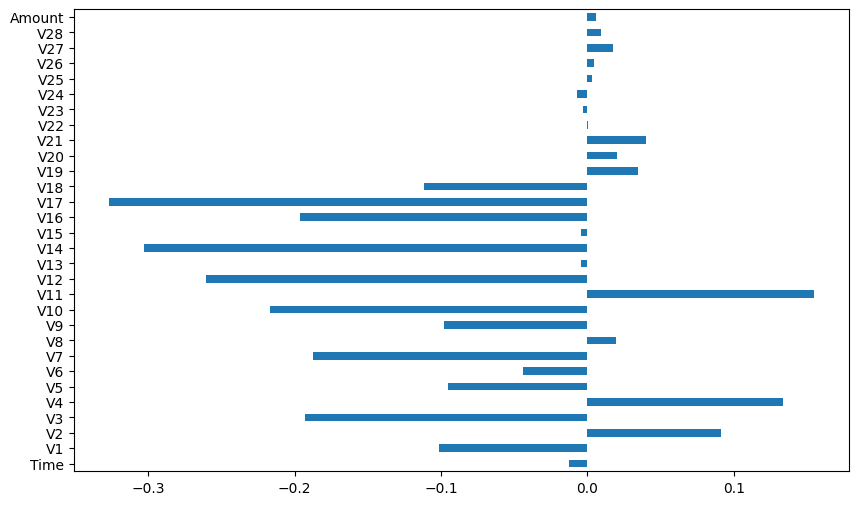

In [6]:
correlation_values= raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh',figsize=(10,6))

In [7]:
raw_data.iloc[:,1:30]= StandardScaler().fit_transform(raw_data.iloc[:,1:30])
data_matrix= raw_data.values

X= data_matrix[:,1:30]

Y= data_matrix[:,30]

X= normalize(X,norm='l1')

In [9]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)

In [10]:
w_train= compute_sample_weight('balanced',Y_train)

In [11]:
dt= DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train,Y_train,sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [12]:
svm= LinearSVC(class_weight='balanced',random_state=31,loss='hinge',fit_intercept=False)

svm.fit(X_train,Y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [29]:
Y_pred_dt= dt.predict_proba(X_test)[:,1]

In [18]:
roc_auc_dt= roc_auc_score(Y_test,Y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


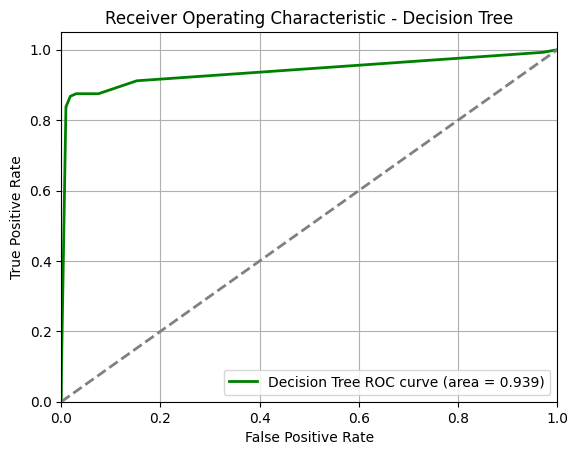

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_scores_dt = dt.predict_proba(X_test)[:, 1]


fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)


plt.figure()
plt.plot(fpr_dt, tpr_dt, color='green', lw=2,
         label='Decision Tree ROC curve (area = %0.3f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [21]:
Y_pred_svm= svm.decision_function(X_test)

In [22]:
roc_auc_svm= roc_auc_score(Y_test,Y_pred_svm)
print('SVM ROC-AUC score : {0:.3f}'.format(roc_auc_svm))

SVM ROC-AUC score : 0.986


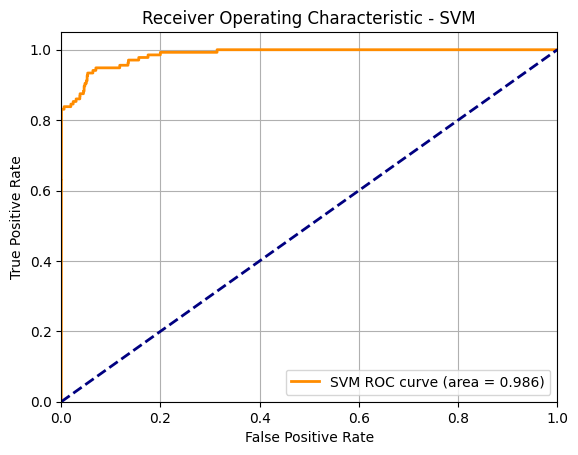

In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt


y_scores = svm.decision_function(X_test)



fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='SVM ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.grid()
plt.show()
